RQA/CRQA Statistics and Visualization Notebook
================================================
Analyzes recurrence quantification analysis results for pose data.
Generates statistical tables and figures for manuscript.


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict
import sys
sys.path.append('utils')
from stats_utils import (
    run_rpy2_lmer,
    fmt,
    COND_ORDER,
    NON_METRIC_COLS,
    pretty_metric,
    run_stats_by_column
)
from nb_utils import build_rqa_table
#from viz_utils import create_2x2_figure

# 1. Configuration
Configure analysis parameters: Set the session type and normalization method to analyze. The normalization affects which head movement features are available (see CRQA mappings below).

In [2]:
# Data files - adjust these paths as needed
SESSION = "experimental"  # or "baseline"
NORMALIZATION = "procrustes_global"  # or "procrustes_global"

RQA_FILE = f"data/rqa/{SESSION}_{NORMALIZATION}__original_rqa_crqa.csv"
OUTPUT_DIR = Path("tables/rqa_stats_results")
FIGS_DIR = Path("figs") / f"{SESSION}_{NORMALIZATION}_rqa"

# Create output directories
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
FIGS_DIR.mkdir(parents=True, exist_ok=True)

# Metrics to extract from RQA results
# These capture different aspects of temporal dynamics:
# - Recurrence/Determinism: repetitiveness and predictability
# - Line lengths: stability of recurring states
# - Entropy/Laminarity: complexity and intermittency
# - Divergence: rate of trajectory separation
RQA_METRICS = [
    "perc_recur",        # % of recurrent points
    "perc_determ",       # % of recurrent points forming diagonal lines
    "maxl_found",        # longest diagonal line
    "mean_line_length",  # average diagonal line length
    "std_line_length",   # variability in line lengths
    "entropy",           # complexity of line length distribution
    "laminarity",        # % of recurrent points in vertical lines
    "trapping_time",     # average vertical line length
    "vmax",              # longest vertical line
    "divergence",        # inverse of maxl (trajectory separation rate)
    "trend_lower_diag",  # nonstationarity below main diagonal
    "trend_upper_diag"   # nonstationarity above main diagonal
]
print(f"Loading RQA data from: {RQA_FILE}")
df = pd.read_csv(RQA_FILE)

# Standardize condition labels to ensure proper ordering (Low → Moderate → High)
df["participant"] = df["participant"].astype(str)
df["condition"] = df["condition"].astype(str).str.strip().str.upper()
df["condition"] = pd.Categorical(df["condition"], categories=COND_ORDER, ordered=True)

# Filter to valid conditions only
df = df[df["condition"].isin(COND_ORDER)].copy()

# Coerce metric columns to numeric (handles any string values)
for col in RQA_METRICS:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

print(f"Loaded {len(df)} rows across {df['column'].nunique()} data types")
print(f"Participants: {sorted(df['participant'].unique())}")
print(f"Data types: {sorted(df['column'].unique())}")

Loading RQA data from: data/rqa/experimental_procrustes_global__original_rqa_crqa.csv


FileNotFoundError: [Errno 2] No such file or directory: 'data/rqa/experimental_procrustes_global__original_rqa_crqa.csv'

# 2. Statistical Analysis
Run mixed-effects models: Fit linear mixed-effects models for each RQA metric across all data types. Models include random intercepts for participants and test load effects with post-hoc pairwise comparisons.

In [ ]:
print("\n" + "="*70)
print("RUNNING STATISTICAL MODELS")
print("="*70)

# Runs LME models via rpy2 for each column × metric combination
# Returns: dict[column][metric] → (estimates, p-values, means, sems)
stats_results = run_stats_by_column(df, RQA_METRICS)


RUNNING STATISTICAL MODELS

Analyzing: blink_aperture
  ✓ perc_recur
  ✓ perc_determ
  ✓ maxl_found
  ✓ mean_line_length
  ✓ std_line_length
  ✓ entropy
  ✓ laminarity
  ✓ trapping_time
  ✓ vmax
  ✓ divergence
  ✓ trend_lower_diag
  ✓ trend_upper_diag

Analyzing: crqa_head_pupil_mag
  ✓ perc_recur
  ✓ perc_determ
  ✓ maxl_found
  ✓ mean_line_length
  ✓ std_line_length
  ✓ entropy
  ✓ laminarity
  ✓ trapping_time
  ✓ vmax


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ divergence


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ trend_lower_diag
  ✓ trend_upper_diag

Analyzing: crqa_head_pupil_x


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ perc_recur
  ✓ perc_determ


R callback write-console: boundary (singular) fit: see help('isSingular')
  
R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ maxl_found
  ✓ mean_line_length


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ std_line_length
  ✓ entropy


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ laminarity
  ✓ trapping_time


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ vmax


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ divergence
  ✓ trend_lower_diag


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ trend_upper_diag

Analyzing: crqa_head_pupil_y
  ✓ perc_recur
  ✓ perc_determ
  ✓ maxl_found
  ✓ mean_line_length
  ✓ std_line_length
  ✓ entropy
  ✓ laminarity
  ✓ trapping_time
  ✓ vmax


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ divergence


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ trend_lower_diag
  ✓ trend_upper_diag

Analyzing: head_motion_mag
  ✓ perc_recur
  ✓ perc_determ
  ✓ maxl_found
  ✓ mean_line_length
  ✓ std_line_length
  ✓ entropy
  ✓ laminarity
  ✓ trapping_time
  ✓ vmax
  ✓ divergence
  ✓ trend_lower_diag
  ✓ trend_upper_diag

Analyzing: head_rotation_rad
  ✓ perc_recur
  ✓ perc_determ
  ✓ maxl_found
  ✓ mean_line_length
  ✓ std_line_length
  ✓ entropy
  ✓ laminarity
  ✓ trapping_time
  ✓ vmax
  ✓ divergence
  ✓ trend_lower_diag
  ✓ trend_upper_diag

Analyzing: head_tx
  ✓ perc_recur
  ✓ perc_determ
  ✓ maxl_found
  ✓ mean_line_length
  ✓ std_line_length
  ✓ entropy
  ✓ laminarity
  ✓ trapping_time
  ✓ vmax
  ✓ divergence
  ✓ trend_lower_diag
  ✓ trend_upper_diag

Analyzing: head_ty
  ✓ perc_recur
  ✓ perc_determ
  ✓ maxl_found
  ✓ mean_line_length
  ✓ std_line_length
  ✓ entropy
  ✓ laminarity
  ✓ trapping_time
  ✓ vmax
  ✓ divergence
  ✓ trend_lower_diag
  ✓ trend_upper_diag

Analyzing: interocular
  ✓ perc_recur
  ✓ perc_determ
  ✓ maxl_foun

R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ divergence


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ trend_lower_diag


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ trend_upper_diag

Analyzing: pupil_dx
  ✓ perc_recur


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ perc_determ
  ✓ maxl_found
  ✓ mean_line_length
  ✓ std_line_length
  ✓ entropy
  ✓ laminarity


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ trapping_time
  ✓ vmax


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ divergence


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ trend_lower_diag
  ✓ trend_upper_diag

Analyzing: pupil_dy
  ✓ perc_recur
  ✓ perc_determ
  ✓ maxl_found
  ✓ mean_line_length
  ✓ std_line_length
  ✓ entropy
  ✓ laminarity
  ✓ trapping_time
  ✓ vmax
  ✓ divergence
  ✓ trend_lower_diag
  ✓ trend_upper_diag

Analyzing: pupil_metric
  ✓ perc_recur


R callback write-console: boundary (singular) fit: see help('isSingular')
  


  ✓ perc_determ
  ✓ maxl_found
  ✓ mean_line_length
  ✓ std_line_length
  ✓ entropy
  ✓ laminarity
  ✓ trapping_time
  ✓ vmax
  ✓ divergence
  ✓ trend_lower_diag
  ✓ trend_upper_diag


# 3. Build Latex Table
Creates a formatted LaTeX table with β coefficients and p-values for all metrics and data types.

In [ ]:
table_file = OUTPUT_DIR / f"{SESSION}_{NORMALIZATION}_rqa_table.tex"
build_rqa_table(stats_results, table_file)


✅ Table written to: tables/rqa_stats_results/experimental_procrustes_global_rqa_table.tex


# 4. Bar Plots
Generate 2×2 barplot figure: figure showing key RQA/CRQA results with error bars (±1 SEM) and significance markers.


CREATING FIGURE


/var/folders/fg/dc68zxv12sz5v55n18sqsvmw0000gn/T/ipykernel_1195/3999508764.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = dsub.groupby("condition")[metric].agg(["mean", sem]).reindex(COND_ORDER)
/var/folders/fg/dc68zxv12sz5v55n18sqsvmw0000gn/T/ipykernel_1195/3999508764.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = dsub.groupby("condition")[metric].agg(["mean", sem]).reindex(COND_ORDER)
/var/folders/fg/dc68zxv12sz5v55n18sqsvmw0000gn/T/ipykernel_1195/3999508764.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pa

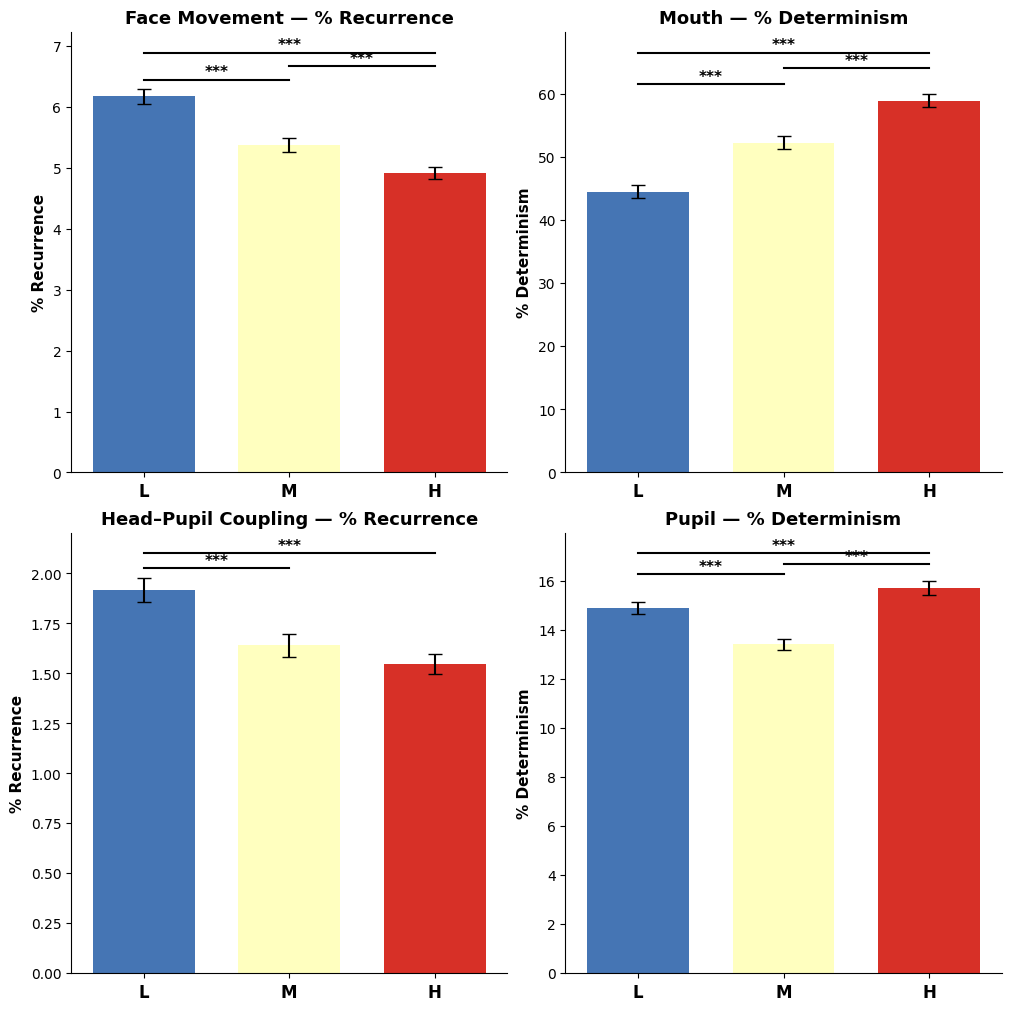

✅ Figure saved to: figs/experimental_original_rqa/experimental_original_rqa_2x2.svg


In [ ]:

def sem(series):
    """Calculate standard error of the mean."""
    s = pd.Series(series).astype(float)
    return s.std(ddof=1) / np.sqrt(s.count())


def create_2x2_figure(df, stats_results, plot_specs=None):
    """
    Create a 2x2 figure showing key RQA/CRQA results.
    
    Args:
        df: DataFrame with RQA results
        stats_results: Dictionary of statistical results
        plot_specs: List of 4 tuples, each containing:
            (col_name, metric, title, ylabel, ylim)
            If None, uses default specifications
    """
    # Default specifications if none provided
    if plot_specs is None:
        plot_specs = [
            ("center_face_magnitude", "perc_recur", 
             "Face Movement — % Recurrence", "% Recurrence", None),
            ("blink_aperture", "perc_determ",
             "Blink — % Determinism", "% Determinism", None),
            ("crqa_head_pupil_mag", "perc_recur",
             "Head–Pupil CRQA (Magnitude)", "% Recurrence", None),
            ("crqa_head_pupil_x", "perc_recur",
             "Head–Pupil CRQA (X-axis)", "% Recurrence", None),
        ]
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
    axes_flat = axes.flatten()
    
    def barplot(ax, col_name, metric, title, ylabel, ylim=None):
        """Helper to create one barplot panel."""
        dsub = df[df["column"] == col_name].copy()
        agg = dsub.groupby("condition")[metric].agg(["mean", sem]).reindex(COND_ORDER)
        
        idx = np.arange(len(COND_ORDER))
        means = agg["mean"].to_numpy(dtype=float)
        errs = agg["sem"].to_numpy(dtype=float)
        
        ax.bar(idx, means, yerr=errs, capsize=5, width=0.7, 
               color=['#4575b4', "#ffffbf", '#d73027'])
        ax.set_xticks(idx)
        ax.set_xticklabels(COND_ORDER, fontsize=12, fontweight='bold')
        ax.set_title(title, fontsize=13, fontweight='bold')
        ax.set_ylabel(ylabel, fontsize=11, fontweight='bold')
        ax.set_xlim(-0.5, len(COND_ORDER) - 0.5)
        ax.spines[['top', 'right']].set_visible(False)
        
        if ylim is not None:
            ax.set_ylim(ylim)
        
        # Add significance stars if available
        if col_name in stats_results and metric in stats_results[col_name]:
            _, pvals, _, _ = stats_results[col_name][metric]
            
            # Get y position for stars
            y_max = max(means + errs)
            y_range = y_max - min(means - errs)
            
            # Check each pairwise comparison
            comparisons = [
                (0, 1, pvals.get(("L", "M"))),  # L vs M
                (1, 2, pvals.get(("M", "H"))),  # M vs H
                (0, 2, pvals.get(("L", "H")))   # L vs H
            ]
            
            offset = 0
            for i, j, p in comparisons:
                if p is not None and not np.isnan(p) and p < 0.05:
                    stars = '***' if p < 0.001 else '**' if p < 0.01 else '*'
                    y = y_max + 0.1 * y_range + offset * 0.15 * y_range
                    ax.plot([idx[i], idx[j]], [y, y], 'k-', lw=1.5)
                    ax.text((idx[i] + idx[j]) / 2, y, stars, 
                           ha='center', va='bottom', fontsize=11, fontweight='bold')
                    offset += 1
    
    # Create each panel based on specifications
    for i, spec in enumerate(plot_specs[:4]):  # Limit to 4 plots
        col_name, metric, title, ylabel, ylim = spec
        
        # Check if column exists in data
        if col_name in df["column"].unique():
            barplot(axes_flat[i], col_name, metric, title, ylabel, ylim)
        else:
            # If column doesn't exist, show warning text
            axes_flat[i].text(0.5, 0.5, f'Column "{col_name}" not found', 
                            transform=axes_flat[i].transAxes, 
                            ha='center', va='center', fontsize=12)
            axes_flat[i].set_title(title, fontsize=13, fontweight='bold')
    
    return fig
# ══════════════════════════════════════════════════════════════════════
# 4. VISUALIZATION: 2x2 BARPLOT FIGURE
# ══════════════════════════════════════════════════════════════════════
print("\n" + "="*70)
print("CREATING FIGURE")
print("="*70)

custom_specs = [
    # Panel 1: Face movement fragmentation
    ("center_face_magnitude", "perc_recur", 
     "Face Movement — % Recurrence", "% Recurrence", None),
    
    # Panel 2: Mouth progressive structuring (divergent pattern)
    ("mouth_aperture", "perc_determ",
     "Mouth — % Determinism", "% Determinism", None),
    
    # Panel 3: Gaze-head decoupling
    ("crqa_head_pupil_mag", "perc_recur",
     "Head–Pupil Coupling — % Recurrence", "% Recurrence", None),
    
    # Panel 4: Reorganization signature (U-shaped pattern)
    ("pupil_metric", "perc_determ",
     "Pupil — % Determinism", "% Determinism", None),
]

fig = create_2x2_figure(df, stats_results, plot_specs=custom_specs)

fig_file = FIGS_DIR / f"{SESSION}_{NORMALIZATION}_rqa_2x2.svg"
fig.savefig(fig_file, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Figure saved to: {fig_file}")

# 5. Summary Stats
Display key results in console: Shows condition means and significant contrasts for quick review.

In [ ]:
print("\n" + "="*70)
print("SUMMARY")
print("="*70)

for col_name, metrics_dict in stats_results.items():
    print(f"\n{col_name}:")
    for metric, (ests, pvals, means, _) in metrics_dict.items():
        print(f"  {metric}:")
        print(f"    Means: L={means.get('L', np.nan):.3f}, "
              f"M={means.get('M', np.nan):.3f}, H={means.get('H', np.nan):.3f}")
        
        # Show significant contrasts
        sig = []
        for pair, p in pvals.items():
            if p < 0.05:
                est = ests.get(pair, np.nan)
                sig.append(f"{pair[1]}-{pair[0]}={est:.3f} (p={p:.3f})")
        if sig:
            print(f"    Significant: {', '.join(sig)}")

print("\n" + "="*70)
print("ANALYSIS COMPLETE")
print("="*70)
print(f"\nOutputs saved to:")
print(f"  Tables: {OUTPUT_DIR}")
print(f"  Figures: {FIGS_DIR}")


SUMMARY

blink_aperture:
  perc_recur:
    Means: L=6.353, M=6.172, H=6.612
    Significant: H-M=0.440 (p=0.001)
  perc_determ:
    Means: L=73.860, M=74.036, H=76.857
    Significant: H-L=2.997 (p=0.000), H-M=2.822 (p=0.000)
  maxl_found:
    Means: L=353.138, M=340.863, H=347.502
    Significant: M-L=-12.275 (p=0.047)
  mean_line_length:
    Means: L=9.047, M=9.097, H=9.749
    Significant: H-L=0.702 (p=0.000), H-M=0.651 (p=0.000)
  std_line_length:
    Means: L=10.270, M=10.199, H=11.308
    Significant: H-L=1.038 (p=0.000), H-M=1.109 (p=0.000)
  entropy:
    Means: L=3.577, M=3.590, H=3.726
    Significant: H-L=0.148 (p=0.000), H-M=0.136 (p=0.000)
  laminarity:
    Means: L=0.838, M=0.840, H=0.857
    Significant: H-L=0.019 (p=0.000), H-M=0.017 (p=0.000)
  trapping_time:
    Means: L=11.697, M=11.765, H=12.746
    Significant: H-L=1.049 (p=0.000), H-M=0.981 (p=0.000)
  vmax:
    Means: L=171.788, M=168.449, H=173.240
  divergence:
    Means: L=0.004, M=0.004, H=0.004
    Significa

# 6. Generate Example Recurrence Plots
Create visual examples of recurrence patterns: Generates example recurrence plots for specific windows showing interesting dynamics. These plots visualize the temporal structure underlying the RQA statistics.
Note: The CRQA mappings differ by normalization type:

original: Uses center_face_* coordinates (camera-relative face position)
procrustes_global: Uses head_t* coordinates (Procrustes-aligned head motion)

In [ ]:
# 6. Generate Example Recurrence Plots
from pathlib import Path
from utils.viz_utils import (
    RecurrenceConfig,
    find_interesting_window, 
    generate_rqa_plot, 
    generate_crqa_plot
)

# Build configuration
cfg = RecurrenceConfig(
    preprocessed_dir=Path(f"data/processed_data/{SESSION}/features/per_frame/{NORMALIZATION}"),
    figs_dir=FIGS_DIR / "recurrence_examples"
)

## RQA Example


GENERATING EXAMPLE RECURRENCE PLOTS

Searching for example: blink_aperture in condition H
  Found: P414 H window 1 (1800-5400)
Plot saved to: figs/baseline_original_rqa/recurrence_examples/rqa_blink_aperture_P414_H_w1800-5400.png


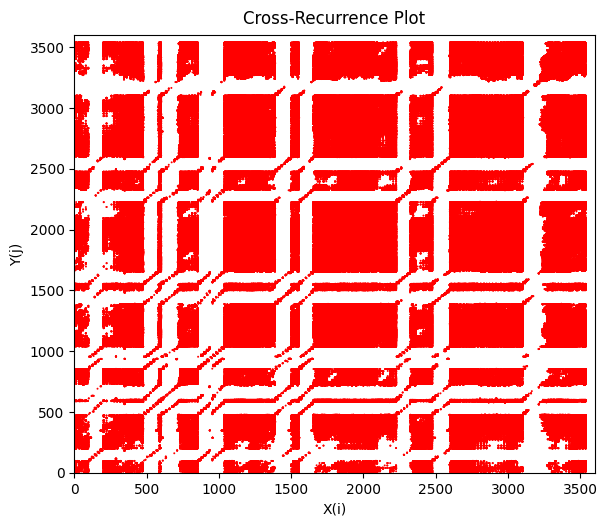

  ✅ RQA plot saved: rqa_blink_aperture_P414_H_w1800-5400.png
      %REC=26.87, %DET=93.68

Searching for example: mouth_aperture in condition M
  Found: P408 M window 2 (3600-7200)


KeyboardInterrupt: 

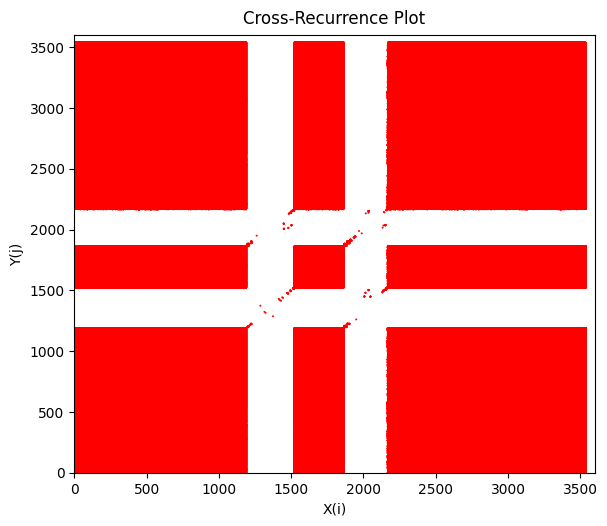

In [ ]:
print("\n" + "="*70)
print("GENERATING EXAMPLE RECURRENCE PLOTS")
print("="*70)

examples_to_plot = [
    ("blink_aperture", "H"),
    ("mouth_aperture", "M"),
]

for column, condition in examples_to_plot:
    print(f"\nSearching for example: {column} in condition {condition}")
    res = find_interesting_window(df, column, metric="perc_recur", condition=condition)
    if res is None:
        print(f"  ⚠️  No data found")
        continue
    pid, cond, w_idx, w_start, w_end = res
    print(f"  Found: P{pid} {cond} window {w_idx} ({w_start}-{w_end})")
    generate_rqa_plot(cfg, pid, cond, column, w_start, w_end)


## CRQA Example

In [ ]:
print("\n" + "="*70)
print("GENERATING EXAMPLE CROSS-RECURRENCE PLOTS")
print("="*70)


crqa_mappings = {
    "original": {
        "crqa_head_pupil_x": ("center_face_x", "pupil_dx", "Head-Pupil X"),
        "crqa_head_pupil_y": ("center_face_y", "pupil_dy", "Head-Pupil Y"),
        "crqa_head_pupil_mag": ("center_face_magnitude", "pupil_metric", "Head-Pupil Mag"),
    },
    "procrustes_global": {
        "crqa_head_pupil_x": ("head_tx", "pupil_dx", "Head-Pupil X"),
        "crqa_head_pupil_y": ("head_ty", "pupil_dy", "Head-Pupil Y"),
        "crqa_head_pupil_mag": ("head_motion_mag", "pupil_metric", "Head-Pupil Mag"),
    }
}

if NORMALIZATION in crqa_mappings:
    for crqa_col, (head_col, pupil_col, label) in crqa_mappings[NORMALIZATION].items():
        if crqa_col not in df["column"].unique():
            continue
        print(f"\nSearching for example: {crqa_col}")
        res = find_interesting_window(df, crqa_col, metric="perc_recur", condition="H")
        if res is None:
            print(f"  ⚠️  No data found")
            continue
        pid, cond, w_idx, w_start, w_end = res
        print(f"  Found: P{pid} {cond} window {w_idx} ({w_start}-{w_end})")
        generate_crqa_plot(cfg, pid, cond, head_col, pupil_col, w_start, w_end, label)
